In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import LocalOutlierFactor
from sklearn import metrics
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df['Heart Disease'] = df['Heart Disease'].astype('category')
df['Heart Disease Codes'] = df['Heart Disease'].cat.codes

df_new = df.drop('Heart Disease', axis=1)
df_new.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease Codes
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease Codes      270 non-null    int8   
dtypes: float64(1), int64(12), 

In [ ]:
#checks for missing values in the dataset.

df_new.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease Codes        0
dtype: int64

<Axes: >

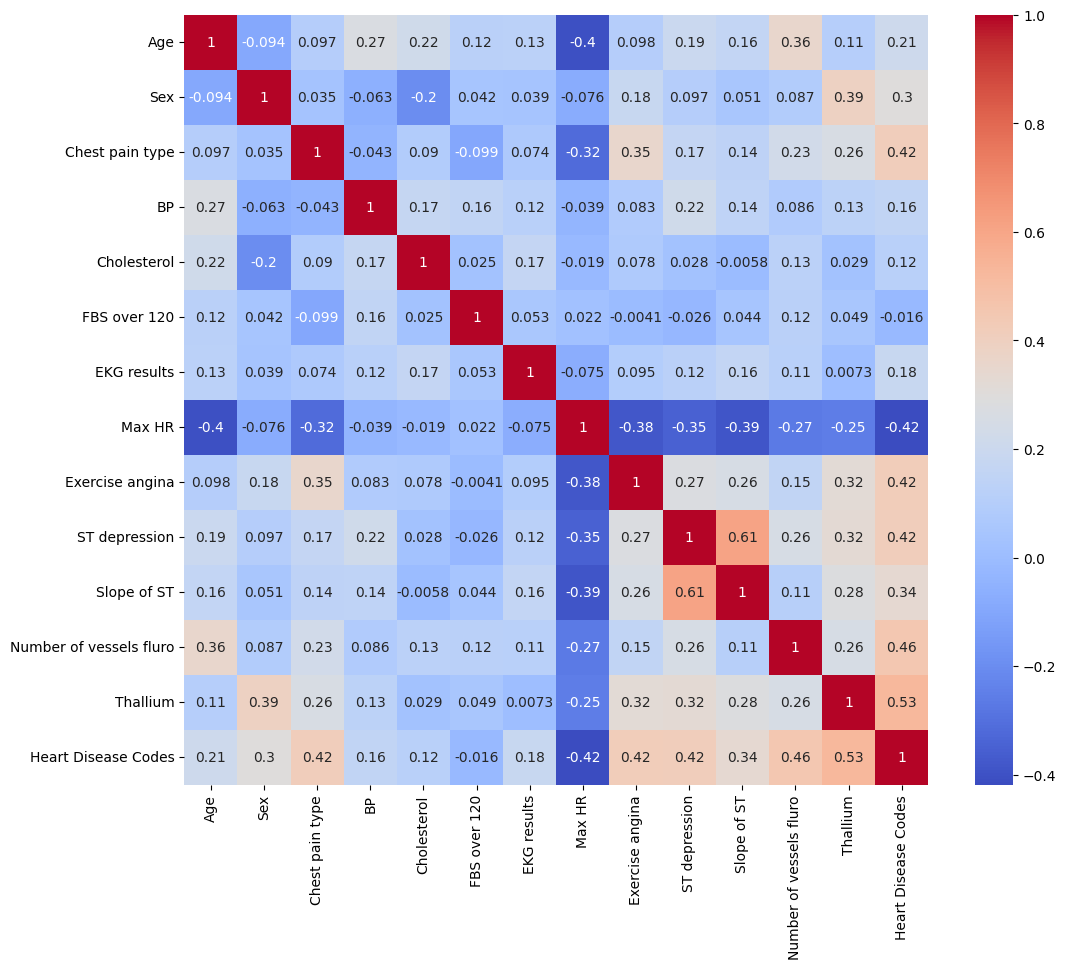

In [ ]:
# Data Visualization
# Correlation matrix
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm')

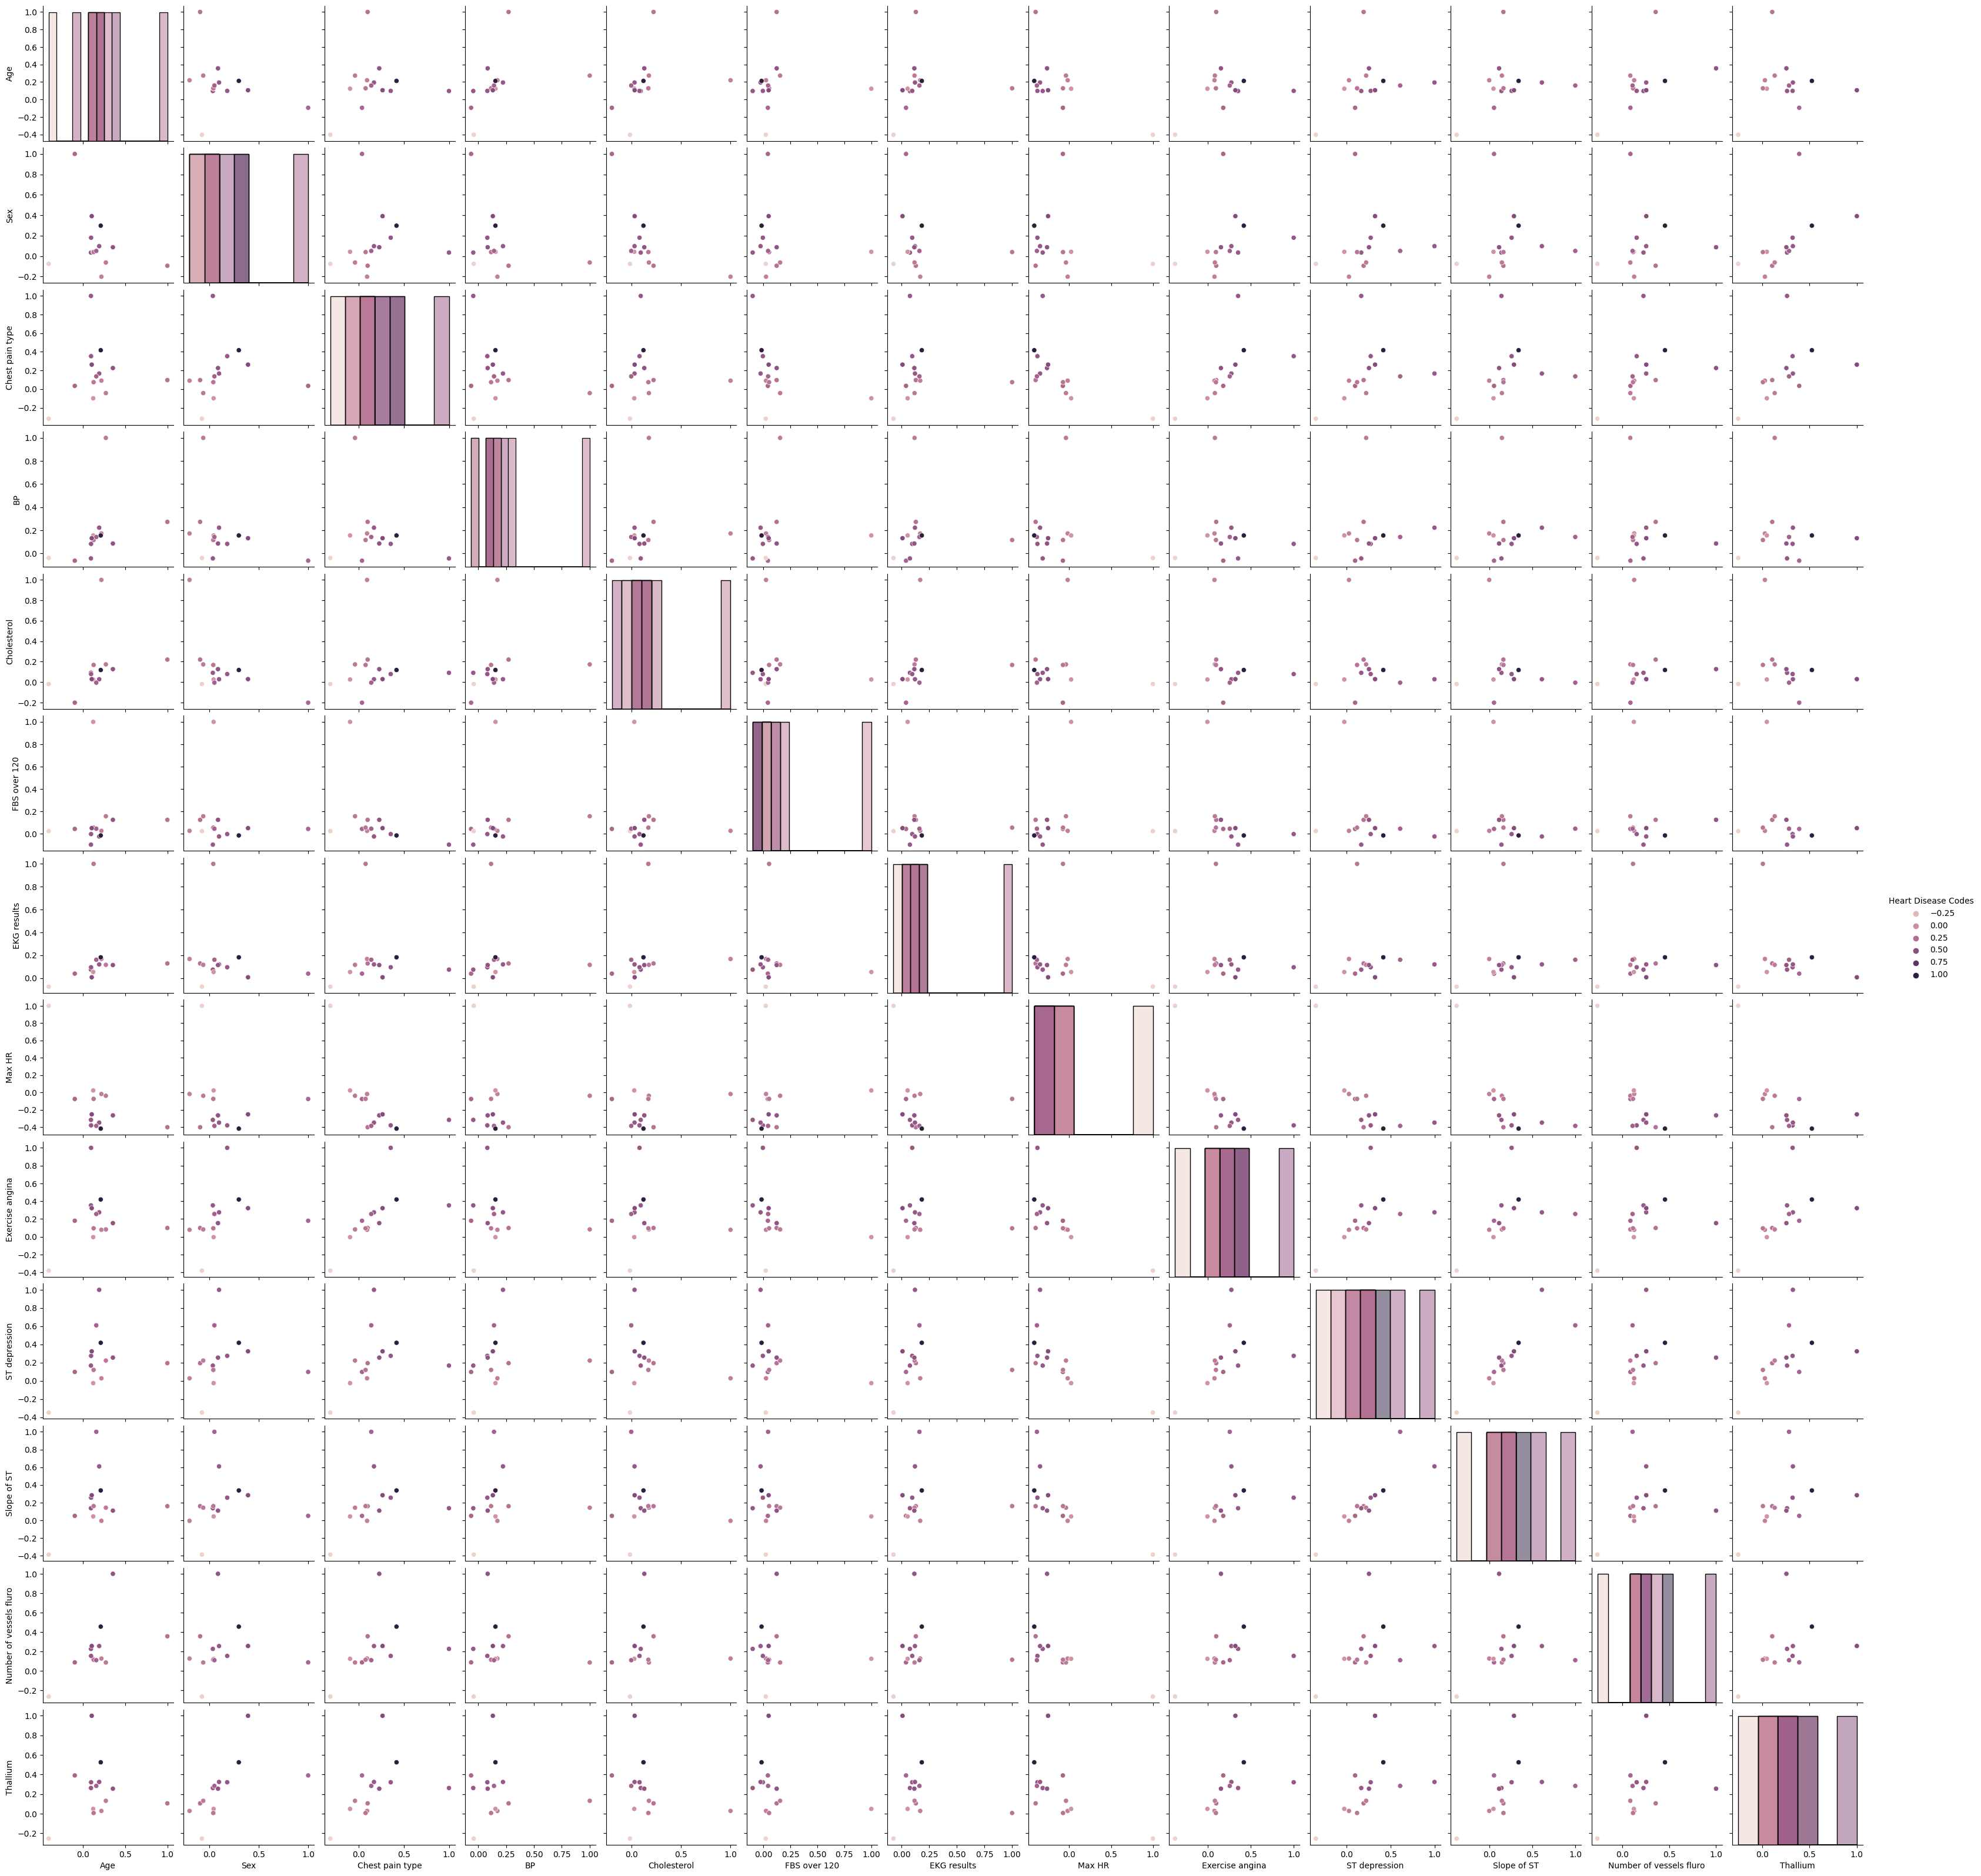

In [ ]:
sns.pairplot(df_new.corr(), hue='Heart Disease Codes', diag_kind='hist')

In [ ]:
#Outlier Detection and Removal
#This step detects and removes outliers using Local Outlier Factor (LOF) algorithm.
features = df_new.drop('Heart Disease Codes',axis=1)
features = df_new.columns.tolist()

lof = LocalOutlierFactor(n_neighbors=20)
df['lof_score'] = lof.fit_predict(df[features])
outliers = df[df['lof_score'] == -1]

print(f"Found {len(outliers)} outliers at indices {outliers.index.tolist()}")

df.drop('lof_score', axis=1, inplace=True)

Found 8 outliers at indices [1, 9, 52, 60, 100, 144, 181, 188]


In [ ]:
#Train-Test Split
x = df_new.drop('Heart Disease Codes',axis=1)
y = df_new['Heart Disease Codes']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)



print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape, '\n')
print('X_train info', X_train.info(), '\n')
print('X_train info', X_test.info())





X_train shape: (216, 13)
X_test shape: (54, 13)
y_train shape: (216,)
y_test shape: (54,) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 49 to 132
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      216 non-null    int64  
 1   Sex                      216 non-null    int64  
 2   Chest pain type          216 non-null    int64  
 3   BP                       216 non-null    int64  
 4   Cholesterol              216 non-null    int64  
 5   FBS over 120             216 non-null    int64  
 6   EKG results              216 non-null    int64  
 7   Max HR                   216 non-null    int64  
 8   Exercise angina          216 non-null    int64  
 9   ST depression            216 non-null    float64
 10  Slope of ST              216 non-null    int64  
 11  Number of vessels fluro  216 non-null    int64  
 12  Thallium                 216 non-null    

In [ ]:
#Model Training

lasso_cv = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

In [ ]:
#Accuracy Score
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', accuracy_score)
print(classification_report(y_test, y_pred))

accuracy score: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.90      0.83      0.86        23

    accuracy                           0.89        54
   macro avg       0.89      0.88      0.88        54
weighted avg       0.89      0.89      0.89        54



In [ ]:
# Define the input data
input_data = (70, 1, 4, 130, 322, 0, 2, 109, 0, 2.4, 2, 3, 3)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make the prediction using the trained model
prediction = lasso_cv.predict(input_data_reshaped)

# Print the prediction
if (prediction[0] == 0):
    print('The person does not have heart disease')
else:
    print('The person has heart disease')


The person has heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
